<a href="https://colab.research.google.com/github/alexeiveselov92/Yandex-Data-Analysis/blob/master/5.%20%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2%20A/B%20%D1%82%D0%B5%D1%81%D1%82%D0%B0%20%D0%B2%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%20%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Принятие решений в бизнесе на основе данных. Приоритезация гипотез. A/B тест.
## Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Оглавление <a id='Оглавление'></a>

### Подготовка
1. [Загрузка библиотек](#1)
2. [Загрузка датасетов и их проверка на наличие пропусков и на правильность выгрузки](#2)

### Приоритизация гипотез
3. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#3)
4. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#4)
5. [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#5)

### Анализ A/B-теста
6. [Проверка корректности распределения на группы A/B](#6)

**Кумулятивные метрики**

7. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#7)
8. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#8)
9. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#9)
10. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#10)
11. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#11)

**Анализ выбросов и всплесков**

12. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#12)
13. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#13)
14. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#14)
15. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#15)
16. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#16)
17. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#17)
18. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#18)
19. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#19)

**Принятие решения по результатам теста**

20. [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#20)

# Подготовка
<a id='1'></a>
### Загрузка библиотек 
[*Назад к оглавлению*](#Оглавление)

In [0]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='2'></a>
### Подгрузим датасеты, проверим их на наличие пропусков и соответствие типам данных, а также правильность выгрузки
[*Назад к оглавлению*](#Оглавление)

In [0]:
orders = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/orders.csv')
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(orders['date'].min(), orders['date'].max()))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
orders.head(5)


Начальная дата 2019-08-01, конечная дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [0]:
visitors = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/visitors.csv')
visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\nНачальная дата {}, конечная дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()
visitors.head(5)
print('\nРезультаты подготовки:\nДанные прочитали, изменили тип данных у столбцов с датами, выгрузка совершена корректно, даты совпадают.')


Начальная дата 2019-08-01, конечная дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

Результаты подготовки:
Данные прочитали, изменили тип данных у столбцов с датами, выгрузка совершена корректно, даты совпадают.


**Результаты подготовки:**

Данные прочитали, изменили тип данных у столбцов с датами, выгрузка совершена корректно, даты совпадают.

# Приоритезация гипотез
<a id='3'></a>
### Приоритезация гипотез методом ICE 
[*Назад к оглавлению*](#Оглавление)

In [0]:
hypotheses = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/hypothesis.csv')
hypotheses['ice'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']
hypotheses['rice'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']
hypotheses.sort_values(by='ice', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


<a id='4'></a>
### Приоритезация гипотез методом RICE 
[*Назад к оглавлению*](#Оглавление)

In [0]:
hypotheses.sort_values(by='rice', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


<a id='5'></a>
### Вывод по приоритезации гипотез 
[*Назад к оглавлению*](#Оглавление)

По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез. 

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

# Анализ A/B-теста
<a id='6'></a>
### Проверим корректность распределения на группы A/B
[*Назад к оглавлению*](#Оглавление)
- Проверим размеры групп в выборке, есть ли разница между ними
- Проверим, корректно ли был рассчитан размер выборки для проведения теста

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


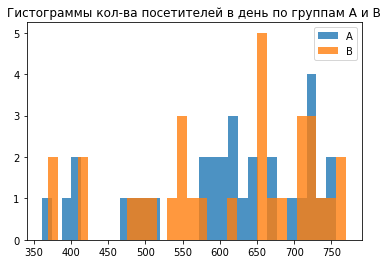

P-value:0.36506882746952496
Разница в количестве посетителей в группах A и B статистически НЕ значима

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121

Вводим начальную конверсию и полученное относительное изменение конверсии в калькулятор
Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html
Получаем необходимое количество выборки 35855 для корректного проведения тестирования
В нашем случае количество 37652 посещений
Кол-во выборки для A/B тестирования корректно подобрано, статистически значимой разницы
в количестве посещений м/у группами не обнаружено

Ок, идём дальше.


In [0]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))
plt.hist(visitors[visitors['group']=='A']['visitors'], alpha = 0.8, label='A', bins = 30)
plt.hist(visitors[visitors['group']=='B']['visitors'], alpha = 0.8, label='B', bins = 30)
plt.legend()
plt.title('Гистограммы кол-ва посетителей в день по группам A и B')
plt.show()
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
resulting_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.3f}'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.3f}'.format(resulting_conversion))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(initial_conversion/resulting_conversion))))
print('\nВводим начальную конверсию и полученное относительное изменение конверсии в калькулятор\n'
     'Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html\n'
     'Получаем необходимое количество выборки 35855 для корректного проведения тестирования\n'
     'В нашем случае количество {} посещений\n'
      'Кол-во выборки для A/B тестирования корректно подобрано, ' 
      'статистически значимой разницы\nв количестве посещений м/у группами не обнаружено\n\nОк, идём дальше.'.format(visitors['visitors'].sum()))

## Кумулятивные метрики
<a id='7'></a>
### Построим график кумулятивной выручки по группам 
[*Назад к оглавлению*](#Оглавление)

In [0]:
#достаем уникальные значения дат и групп
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

#выводим кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
#выводим кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
#сводим все накопительные данные в одну таблицу
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
print('\nПолученная таблица с кумулятивными (накопленными) значениями по дате и группам:'
'\n- кол-во покупок \n- кол-во покупателей \n- выручка \n- кол-во посетителей')
cummulativeData.head(5)


Полученная таблица с кумулятивными (накопленными) значениями по дате и группам:
- кол-во покупок 
- кол-во покупателей 
- выручка 
- кол-во посетителей


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


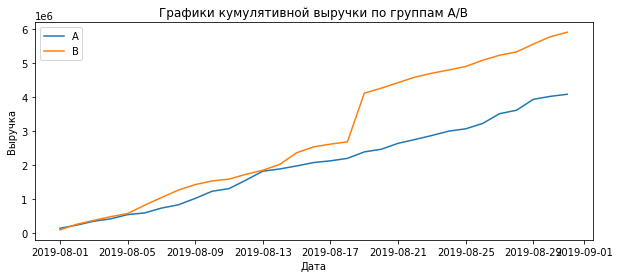

Выводы:
Как мы видим, группа B стабильно показывает большую выручку чем группа A


In [0]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()
print('Выводы:')
print('Как мы видим, группа B стабильно показывает большую выручку чем группа A')

<a id='8'></a>
### Построим график кумулятивного среднего чека по группам 
[*Назад к оглавлению*](#Оглавление)

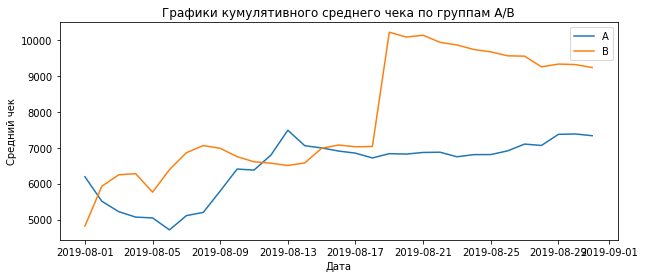

Выводы:
Как мы видим, средний чек в группе B почти всё время был выше, но нас должно 
смутить его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями


In [0]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()
print('Выводы:')
print('Как мы видим, средний чек в группе B почти всё время был выше, но нас должно \nсмутить '
      'его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями')

<a id='9'></a>
### Построим график относительного изменения кумулятивного среднего чека группы B к группе A
[*Назад к оглавлению*](#Оглавление)

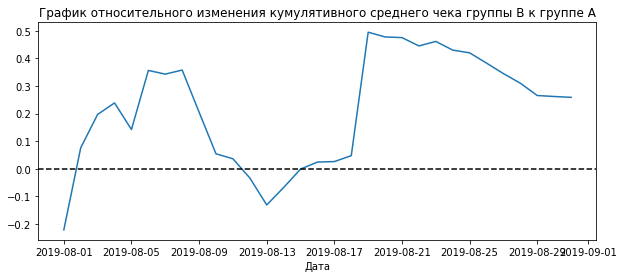

Выводы:
Как мы и говорили, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей


In [0]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/
                                       (mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()
print('Выводы:')
print('Как мы и говорили, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей')

<a id='10'></a>
### Построим график кумулятивной конверсии по группам
[*Назад к оглавлению*](#Оглавление)

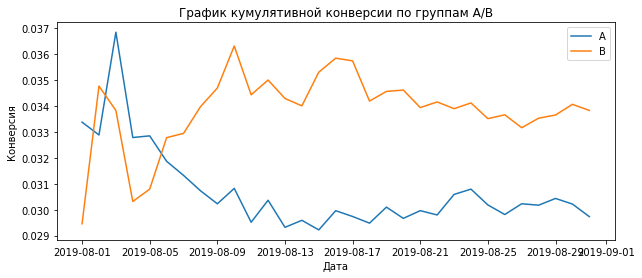

Выводы:
Группа B стабильно показывает большую конверсию чем группа A, это обнадеживает


In [0]:
mergedCummulativeData['conversionA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 
mergedCummulativeData['conversionB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionA'], label='A')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionB'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()
print('Выводы:')
print('Группа B стабильно показывает большую конверсию чем группа A, это обнадеживает')

<a id='11'></a>
### Построим график относительного изменения кумулятивной конверсии группы B к группе A
[*Назад к оглавлению*](#Оглавление)

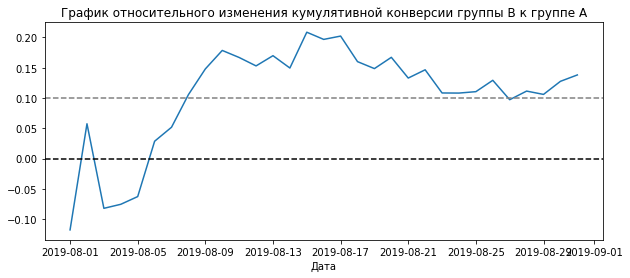

Выводы:
Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала


In [0]:
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['conversionB']/mergedCummulativeData['conversionA'])-1))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()
print('Выводы:')
print('Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала')

## Анализ выбросов и всплесков
<a id='12'></a>
### Построим точечный график количества заказов по пользователям
[*Назад к оглавлению*](#Оглавление)

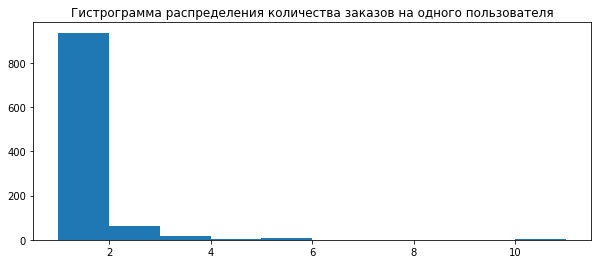

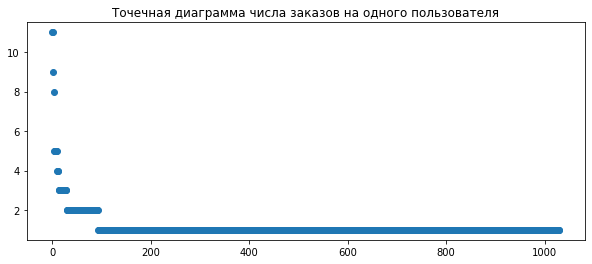

Выводы:
Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов


In [0]:
orders.head(5)
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()
print('Выводы:')
print('Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов')

<a id='13'></a>
### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
[*Назад к оглавлению*](#Оглавление)

In [0]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))
print('\nВыводы:')
print('Как мы и предполагали, больше 2 заказов совершают только 5% пользователей')

Перцентили:
95: 2.0
99: 4.0

Выводы:
Как мы и предполагали, больше 2 заказов совершают только 5% пользователей


<a id='14'></a>
### Построим точечный график стоимостей заказов
[*Назад к оглавлению*](#Оглавление)

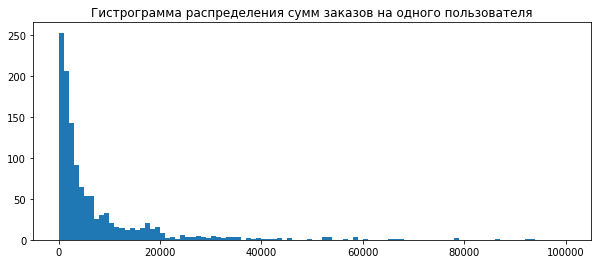

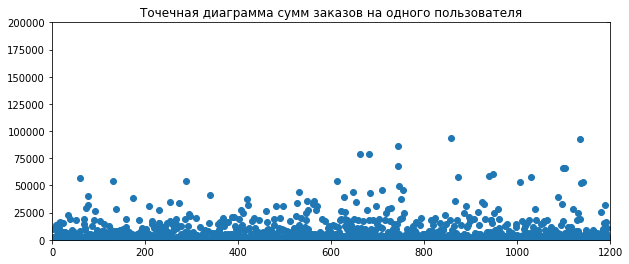

Выводы:
Судя по графикам, большая часть пользователей делает покупки суммой не больше 25-30 т.р. Проверим это далее.


In [0]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.show()
print('Выводы:')
print('Судя по графикам, большая часть пользователей делает покупки суммой не больше 25-30 т.р. Проверим это далее.')

<a id='15'></a>
### Посчитаем 95-й и 99-й перцентили сумм заказов на пользователя. Выберем границу для определения аномальных пользователей.
[*Назад к оглавлению*](#Оглавление)

In [0]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))
print('\nВыводы:')
print('Всего лишь 5% заказов дороже 28 т.р.')

Перцентили:
95: 28000
99: 58233

Выводы:
Всего лишь 5% заказов дороже 28 т.р.


<a id='16'></a>
### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
[*Назад к оглавлению*](#Оглавление)

In [0]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


#составим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам 
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.008396177528376304
По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


<a id='17'></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
[*Назад к оглавлению*](#Оглавление)

In [0]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.3646454927716229
По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


<a id='18'></a>
### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
[*Назад к оглавлению*](#Оглавление)

Ранее мы уже выяснили, что подавляющее большинство пользователей не делает более 2 заказов и сумма 1 покупки в большинстве случаев не превышает 28 т.р. Очистим данные от аномальных пользователей с превышающими данные лимиты значениями.

In [0]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
limit_orders = 2
limit_revenue = 28000

In [0]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


In [0]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.006521296371518379
По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


<a id='19'></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
[*Назад к оглавлению*](#Оглавление)

In [0]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.3692408756572825
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


<a id='20'></a>
## Примем решение по результатам теста 
[*Назад к оглавлению*](#Оглавление)

**Варианты принимаемых решений:** 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

По порядку. Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключили!
Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. 
У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. 
До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. **Данная разница показателей конверсии между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!**